In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")

In [3]:
Credit_Card_Bal = pd.read_csv('C:\\Users\\kbc\\Downloads\\home-credit-default-risk\\credit_card_balance.csv')
Credit_Card_Bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [4]:
Credit_Card_Bal[Credit_Card_Bal["SK_ID_PREV"]==2843414].sort_values("AMT_BALANCE").tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1053335,2843414,316704,-40,140914.080,135000,4500.0,4500.0,0.0,0.0,8100.0,...,140914.080,140914.080,1.0,1,0.0,0.0,63.0,Active,0,0
1025600,2843414,316704,-63,142379.685,135000,4500.0,4500.0,0.0,0.0,8100.0,...,142379.685,142379.685,2.0,2,0.0,0.0,40.0,Active,0,0
3579849,2843414,316704,-66,142475.625,135000,4950.0,4950.0,0.0,0.0,8100.0,...,142475.625,142475.625,3.0,3,0.0,0.0,37.0,Active,0,0
3168971,2843414,316704,-50,143614.890,135000,8100.0,8100.0,0.0,0.0,8100.0,...,143614.890,143614.890,3.0,3,0.0,0.0,53.0,Active,0,0
1906268,2843414,316704,-75,145914.075,135000,2250.0,2250.0,0.0,0.0,8100.0,...,145914.075,145914.075,1.0,1,0.0,0.0,28.0,Active,1,1


In [5]:
Credit_Card_Bal[Credit_Card_Bal["SK_ID_CURR"]==456237]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
116762,2556618,456237,-12,160839.855,225000,0.0,0.0,0.0,0.0,8159.490,...,160839.855,160839.855,0.0,0,0.0,0.0,2.0,Active,0,0
584207,2556618,456237,-1,0.000,0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,10.0,Active,0,0
686642,2556618,456237,-8,42555.600,225000,9000.0,9000.0,0.0,0.0,6461.505,...,42555.600,42555.600,1.0,1,0.0,0.0,6.0,Active,0,0
731599,2556618,456237,-14,120266.010,225000,130500.0,130500.0,0.0,0.0,0.000,...,121270.860,121270.860,3.0,3,0.0,0.0,0.0,Active,0,0
756603,2556618,456237,-3,0.000,225000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,10.0,Active,0,0
1122670,2556618,456237,-4,0.000,225000,0.0,0.0,0.0,0.0,2162.970,...,0.000,0.000,0.0,0,0.0,0.0,10.0,Active,0,0
1152516,2556618,456237,-11,157526.190,225000,0.0,0.0,0.0,0.0,7997.760,...,156363.840,156363.840,0.0,0,0.0,0.0,3.0,Active,0,0
1719247,2556618,456237,-9,113039.010,225000,26100.0,26100.0,0.0,0.0,8631.630,...,111693.510,111693.510,2.0,2,0.0,0.0,5.0,Active,0,0
2045668,2556618,456237,-2,0.000,225000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,10.0,Active,0,0
2474279,2556618,456237,-13,146229.660,225000,27000.0,27000.0,0.0,0.0,6876.225,...,147427.200,147427.200,2.0,2,0.0,0.0,1.0,Active,0,0


In [ ]:
Credit_Card_Bal[Credit_Card_Bal["SK_ID_CURR"]==378907]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,1800.000,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
122799,2562384,378907,-30,45328.320,270000,0.0,0.000,0.0,0.000,2332.035,2475.000,2475.000,44165.655,45670.275,45670.275,0.0,0,0.0,0.0,18.0,Active,0,0
153474,2562384,378907,-8,129.240,135000,0.0,22005.000,0.0,22005.000,2250.000,31500.000,31500.000,0.000,0.000,0.000,0.0,1,0.0,1.0,33.0,Active,0,0
330701,2562384,378907,-2,28.575,9000,0.0,0.000,0.0,0.000,1916.910,1916.910,1916.910,0.000,28.575,28.575,0.0,0,0.0,0.0,39.0,Active,0,0
419198,2562384,378907,-12,0.000,45000,0.0,0.000,0.0,0.000,0.000,72.135,72.135,0.000,0.000,0.000,0.0,0,0.0,0.0,29.0,Active,0,0
561468,2562384,378907,-39,56570.940,270000,0.0,0.000,0.0,0.000,2761.740,0.000,0.000,53023.140,56570.940,56570.940,0.0,0,0.0,0.0,9.0,Active,6,6
577279,2562384,378907,-27,43030.845,270000,0.0,0.000,0.0,0.000,2250.000,2475.000,2475.000,41996.700,43360.290,43360.290,0.0,0,0.0,0.0,21.0,Active,0,0
596084,2562384,378907,-19,0.000,45000,0.0,0.000,0.0,0.000,281.475,353.610,353.610,0.000,0.000,0.000,0.0,0,0.0,0.0,29.0,Active,0,0
722949,2562384,378907,-13,0.000,45000,0.0,0.000,0.0,0.000,0.000,72.135,72.135,0.000,0.000,0.000,0.0,0,0.0,0.0,29.0,Active,0,0
889286,2562384,378907,-17,0.000,45000,0.0,0.000,0.0,0.000,0.000,72.135,72.135,0.000,0.000,0.000,0.0,0,0.0,0.0,29.0,Active,0,0


In [6]:
Credit_Card_Bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [8]:
Credit_Card_Bal.nunique()

SK_ID_PREV                     104307
SK_ID_CURR                     103558
MONTHS_BALANCE                     96
AMT_BALANCE                   1347904
AMT_CREDIT_LIMIT_ACTUAL           181
AMT_DRAWINGS_ATM_CURRENT         2267
AMT_DRAWINGS_CURRENT           187005
AMT_DRAWINGS_OTHER_CURRENT       1832
AMT_DRAWINGS_POS_CURRENT       168748
AMT_INST_MIN_REGULARITY        312266
AMT_PAYMENT_CURRENT            163209
AMT_PAYMENT_TOTAL_CURRENT      182957
AMT_RECEIVABLE_PRINCIPAL      1195839
AMT_RECIVABLE                 1338878
AMT_TOTAL_RECEIVABLE          1339008
CNT_DRAWINGS_ATM_CURRENT           44
CNT_DRAWINGS_CURRENT              129
CNT_DRAWINGS_OTHER_CURRENT         11
CNT_DRAWINGS_POS_CURRENT          133
CNT_INSTALMENT_MATURE_CUM         121
NAME_CONTRACT_STATUS                7
SK_DPD                            917
SK_DPD_DEF                        378
dtype: int64

 In contrast to Pos_Cash data,  each applicant has one credit card from Bureau, small number of applicants have more credit cards.

In [9]:
Credit_Card_Bal[Credit_Card_Bal["SK_ID_PREV"]==1891521].sort_values("MONTHS_BALANCE").tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
56769,1891521,126868,-5,459959.130,450000,0.0,17469.000,0.0,17469.000,22899.645,...,459959.130,459959.130,0.0,1,0.0,1.0,97.0,Active,0,0
2611945,1891521,126868,-4,457896.285,450000,0.0,13675.500,0.0,13675.500,22997.970,...,457896.285,457896.285,0.0,4,0.0,4.0,98.0,Active,0,0
728020,1891521,126868,-3,461330.505,450000,18000.0,18000.000,0.0,0.000,22894.830,...,461330.505,461330.505,1.0,1,0.0,0.0,99.0,Active,0,0
1701346,1891521,126868,-2,458497.395,450000,0.0,13113.405,0.0,13113.405,23066.505,...,458497.395,458497.395,0.0,2,0.0,2.0,100.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


SK_ID_PREV 	ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit) -	Home Credit kredisi ile ilişkili önceki kredilerin ID’si

SK_ID_CURR	ID of loan in our sample -	Kredinin ID numarası

MONTHS_BALANCE	Month of balance relative to application date (-1 means the freshest balance date)	time only relative to the application	- Onceki kredilerin aylara gore, odeme  durumu, -1 en yeni veri

AMT_BALANCE	Balance during the month of previous credit		- Başvuru tarihine göre bakiye ayı (-1 değeri, daha yeni bakiye tarihine karşılık geliyor.)

AMT_CREDIT_LIMIT_ACTUAL	Credit card limit during the month of the previous credit. -		Onceki kredinin kredi kart limiti

AMT_DRAWINGS_ATM_CURRENT	Amount drawing at ATM during the month of the previous credit. -	Onceki kredi bankamatikten cekilen para

AMT_DRAWINGS_CURRENT	Amount drawing during the month of the previous credit.-		Onceki kredi cekilen para

AMT_DRAWINGS_OTHER_CURRENT	Amount of other drawings during the month of the previous credit.-		Onceki krediden diger cekimler

AMT_DRAWINGS_POS_CURRENT	Amount drawing or buying goods during the month of the previous credit. -		Cekilen para veya alinan mallar once krediden

AMT_INST_MIN_REGULARITY	Minimal installment for this month of the previous credit. -	Onceki kredinin minumum aylik odemesi

AMT_PAYMENT_CURRENT	How much did the client pay during the month on the previous credit. -	Musterinin onceki kredinin ne kadarini odedigi o ayda

AMT_PAYMENT_TOTAL_CURRENT	How much did the client pay during the month in total on the previous credit. -		Musterinin onceki kredinin ne kadarini odedigi toplamda

AMT_RECEIVABLE_PRINCIPAL	Amount receivable for principal on the previous credit. -		Onceki krediden, kalan anapara  odenecek

AMT_RECIVABLE	Amount receivable on the previous credit. -		Onceki krediden, kalan banka alacagi

AMT_TOTAL_RECEIVABLE	Total amount receivable on the previous credit. -	Onceki krediden, kalan toplam  odenecek

CNT_DRAWINGS_ATM_CURRENT	Number of drawings at ATM during this month on the previous credit. -		Onceki kredi, bu ay icerisinde ATM den cekis miktari

CNT_DRAWINGS_CURRENT	Number of drawings during this month on the previous credit. -	Onceki kredi, bu ay icerisinde cekis miktari

CNT_DRAWINGS_OTHER_CURRENT	Number of other drawings during this month on the previous credit. -	Onceki kredi, bu ay icerisinde diger cekim miktarlari

CNT_DRAWINGS_POS_CURRENT	Number of drawings for goods during this month on the previous credit. -	Mallar icin onceki krediden, bu ay icerisinde cekis miktari

CNT_INSTALMENT_MATURE_CUM	Number of paid installments on the previous credit. -		Onceki kredi geri odeme sayisi

NAME_CONTRACT_STATUS	Contract status (active signed,...) on the previous credit. -		Onceki kredi kontrat statusu

SK_DPD	DPD (Days past due) during the month on the previous credit. -	Önceki krediden vadesi  geçen günler

SK_DPD_DEF	DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit. -		Bir önceki kredinin toleransla (düşük kredi miktarları olan borçlar dikkate alınmaz) vadesi geçen günler

In [10]:
Credit_Card_Bal['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [11]:
Credit_Card_Bal.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [14]:
pd.DataFrame({"No. of unique values": list(Credit_Card_Bal.nunique())}, index=Credit_Card_Bal.columns)

,No. of unique values
SK_ID_PREV,104307
SK_ID_CURR,103558
MONTHS_BALANCE,96
AMT_BALANCE,1347904
AMT_CREDIT_LIMIT_ACTUAL,181
AMT_DRAWINGS_ATM_CURRENT,2267
AMT_DRAWINGS_CURRENT,187005
AMT_DRAWINGS_OTHER_CURRENT,1832
AMT_DRAWINGS_POS_CURRENT,168748
AMT_INST_MIN_REGULARITY,312266


In [15]:
Credit_Card_Bal.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.0,1.904504e+06,536469.470563,1000018.000,1434385.00,1897122.0,2.369328e+06,2843496.000
SK_ID_CURR,3840312.0,2.783242e+05,102704.475133,100006.000,189517.00,278396.0,3.675800e+05,456250.000
MONTHS_BALANCE,3840312.0,-3.452192e+01,26.667751,-96.000,-55.00,-28.0,-1.100000e+01,-1.000
AMT_BALANCE,3840312.0,5.830016e+04,106307.031025,-420250.185,0.00,0.0,8.904669e+04,1505902.185
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,1.538080e+05,165145.699523,0.000,45000.00,112500.0,1.800000e+05,1350000.000
AMT_DRAWINGS_ATM_CURRENT,3090496.0,5.961325e+03,28225.688579,-6827.310,0.00,0.0,0.000000e+00,2115000.000
AMT_DRAWINGS_CURRENT,3840312.0,7.433388e+03,33846.077334,-6211.620,0.00,0.0,0.000000e+00,2287098.315
AMT_DRAWINGS_OTHER_CURRENT,3090496.0,2.881696e+02,8201.989345,0.000,0.00,0.0,0.000000e+00,1529847.000
AMT_DRAWINGS_POS_CURRENT,3090496.0,2.968805e+03,20796.887047,0.000,0.00,0.0,0.000000e+00,2239274.160
AMT_INST_MIN_REGULARITY,3535076.0,3.540204e+03,5600.154122,0.000,0.00,0.0,6.633911e+03,202882.005


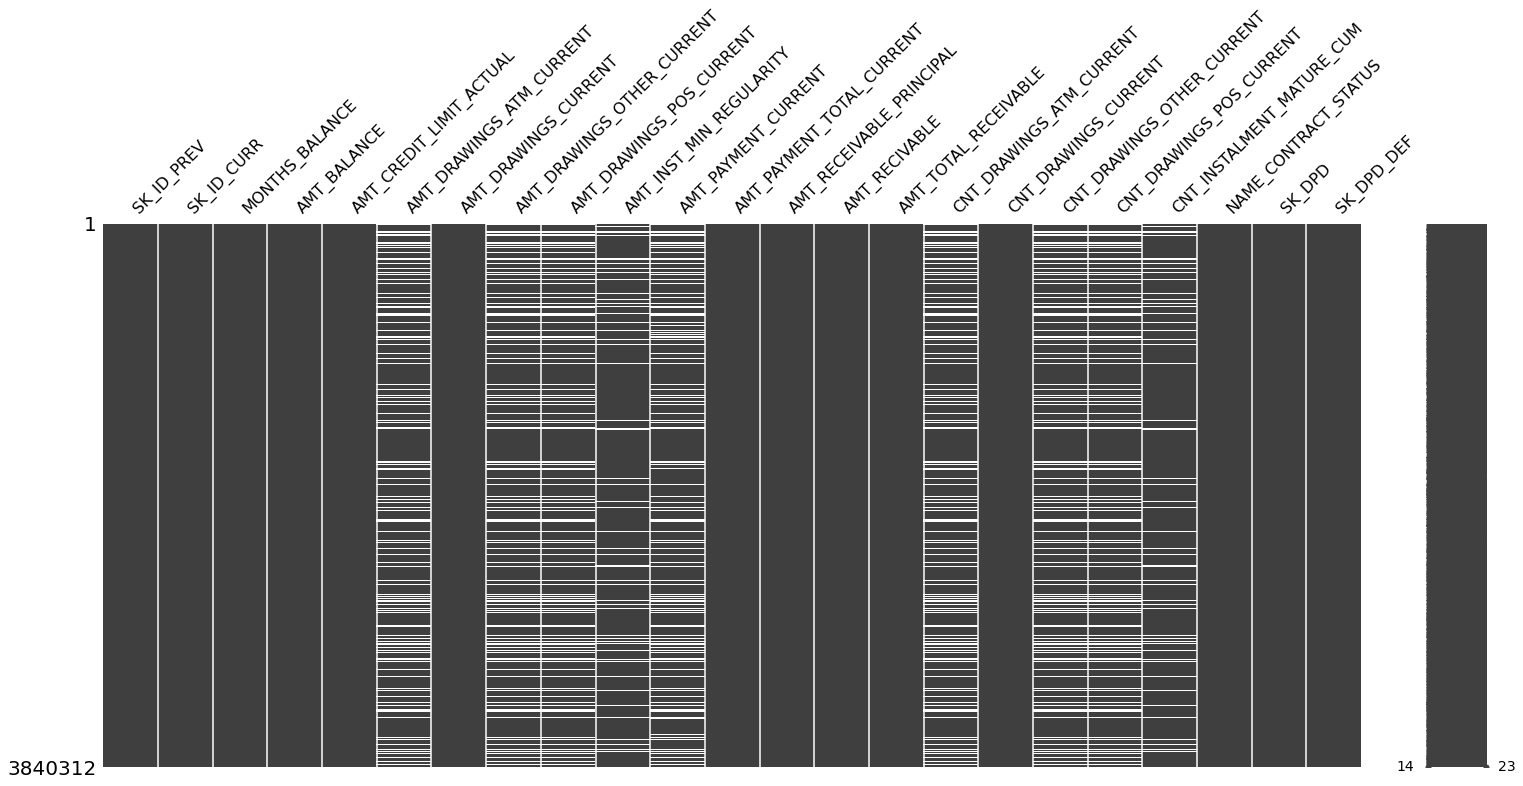

In [16]:
import missingno as msno
msno.matrix(Credit_Card_Bal);

In [18]:
missing_val = []
missing_val_rate = []
for i in Credit_Card_Bal.columns:
    u = Credit_Card_Bal[i].isnull().sum()
    r = (u/len(Credit_Card_Bal)*100)
    missing_val.append(u)
    missing_val_rate.append(r)
    
y=pd.DataFrame( {"no of missing_val": missing_val,  "missing_val_rate": missing_val_rate},  index=Credit_Card_Bal.columns)
y.sort_values("missing_val_rate", ascending=True)

,no of missing_val,missing_val_rate
SK_ID_PREV,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
CNT_DRAWINGS_CURRENT,0,0.000000
AMT_TOTAL_RECEIVABLE,0,0.000000
AMT_RECIVABLE,0,0.000000
AMT_RECEIVABLE_PRINCIPAL,0,0.000000
SK_DPD,0,0.000000
AMT_PAYMENT_TOTAL_CURRENT,0,0.000000
AMT_DRAWINGS_CURRENT,0,0.000000
AMT_CREDIT_LIMIT_ACTUAL,0,0.000000


Text(0.5, 1.0, 'Percentage of missing values in the Credit Card balance data')

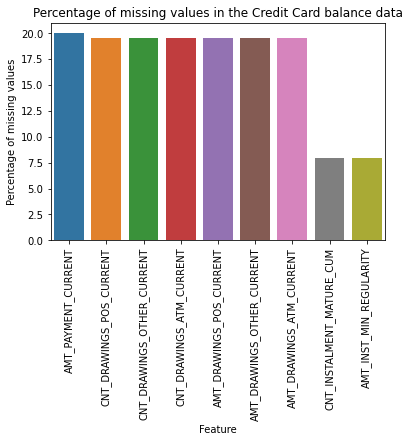

In [19]:
missing_values_sr = Credit_Card_Bal.isnull().sum()
missing_values_df = missing_values_sr.loc[missing_values_sr > 0].sort_values(ascending = False).reset_index()
missing_values_df.columns = ["Feature", "Number of missing values"]
missing_values_df["Percentage of missing values"] = (missing_values_df["Number of missing values"] / Credit_Card_Bal.shape[0]) * 100

sns.barplot(x = missing_values_df["Feature"], y = missing_values_df["Percentage of missing values"])
plt.xticks(rotation = 90)
plt.title("Percentage of missing values in the Credit Card balance data")

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

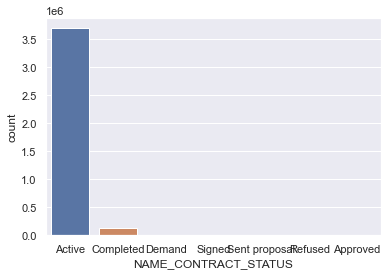

In [20]:
import seaborn as sns; sns.set()
sns.countplot(x="NAME_CONTRACT_STATUS",data=Credit_Card_Bal)

 Feature 1, Number of payments less than mimimum payments (SK_ID_PREV), then it will merged with main data and groupby with "SK_ID_CURR"
It is an indicator to check the tendecy for compliance to payments

In [22]:
Counts_Less_than_min_Payments = Credit_Card_Bal[Credit_Card_Bal['AMT_PAYMENT_TOTAL_CURRENT']/ Credit_Card_Bal['AMT_INST_MIN_REGULARITY'] < 1].groupby(['SK_ID_PREV']).size().reset_index(name='Counts_less_than_min_Payments') 
Counts_Less_than_min_Payments

,SK_ID_PREV,Counts_less_than_min_Payments
0,1000030,4
1,1000094,3
2,1000096,4
3,1000123,2
4,1000130,4
...,...,...
49509,2843476,12
49510,2843477,1
49511,2843478,1
49512,2843493,2


Feature 2, does MONTHS_BALANCE exceed AMT_CREDIT_LIMIT_ACTUAL  (SK_ID_PREV), total number of exceeding per loan, then it will merged with main data and groupby with "SK_ID_CURR"
It is an indicator for excess indebtedness

In [23]:
Counts_debt_over_Limit = Credit_Card_Bal[Credit_Card_Bal['AMT_BALANCE']/ Credit_Card_Bal['AMT_CREDIT_LIMIT_ACTUAL'] > 1].groupby(['SK_ID_PREV']).size().reset_index(name='Counts_amount_over_Limit') 
Counts_debt_over_Limit

,SK_ID_PREV,Counts_amount_over_Limit
0,1000018,1
1,1000087,1
2,1000094,11
3,1000096,5
4,1000128,3
...,...,...
44155,2843389,1
44156,2843414,37
44157,2843423,3
44158,2843448,7


In [24]:
Credit_Card_Bal['AMT_PAYMENT_CURRENT'].equals(Credit_Card_Bal['AMT_PAYMENT_TOTAL_CURRENT'])

False

In [25]:
#Feature 3, Number of Loans, mostly 1 credit card per applicant
CCB = Credit_Card_Bal[0:]
grp = CCB.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index().rename(index = str, columns = {'SK_ID_PREV': 'NO_LOANS'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 

In [26]:
CCB

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NO_LOANS
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.0,1,0.0,1.0,35.0,Active,0,0,1
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,1
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0,1
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0,1
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,1
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0,0.0,0.0,23.0,Active,0,0,1
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0,1
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,1


In [27]:
#Feature 4, Number of Installments paid per Loan per Customer up to application time
grp = CCB.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_MATURE_CUM'].max().reset_index().rename(index = str, columns = {'CNT_INSTALMENT_MATURE_CUM': 'NO_INSTALMENTS'})
grp1 = grp.groupby(by = ['SK_ID_CURR'])['NO_INSTALMENTS'].sum().reset_index().rename(index = str, columns = {'NO_INSTALMENTS': 'TOTAL_INSTALMENTS'})
CCB = CCB.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
del grp, grp1

In [28]:
# Average Number of installments paid per loan 
CCB['INSTALLMENTS_PER_LOAN'] = (CCB['TOTAL_INSTALMENTS']/CCB['NO_LOANS']).astype('uint32')
del CCB['TOTAL_INSTALMENTS']
del CCB['NO_LOANS']

In [31]:
# Feature 5, Feature to calculate number of times Days Past Due occurred, it will be merged to main data

Counts_Late_Payments = CCB[CCB['SK_DPD'] > 0].groupby(['SK_ID_PREV']).size().reset_index(name='Counts_late_Payments') 
Counts_Late_Payments.sort_values(by=['Counts_late_Payments'])

,SK_ID_PREV,Counts_late_Payments
0,1000094,1
5029,1417358,1
10720,1929445,1
10722,1929489,1
19070,2697086,1
...,...,...
1009,1081512,92
5062,1417801,93
55,1003276,94
6764,1564008,94


In [32]:
CCB

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,INSTALLMENTS_PER_LOAN
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.0,1,0.0,1.0,35.0,Active,0,0,39
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,69
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0,36
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0,13
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0,0.0,0.0,23.0,Active,0,0,23
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0,26
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0


In [44]:
grp = CCB.groupby(by= ['SK_ID_CURR'])['SK_DPD'].mean().reset_index().rename(index = str, columns = {'SK_DPD': 'AVG_DPD'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del grp 

In [45]:
CCB_lastmonth = CCB.loc[CCB.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()]

In [46]:
# Feature 4 at the time of application,  for active credits, ratio of Balance (AMT_BALANCE) to total  actual limit (AMT_CREDIT_LIMIT_ACTUAL), is actual limit exceeded or not
CCB_lastmonth['CREDIT_USAGE'] = CCB_lastmonth['AMT_BALANCE']/CCB_lastmonth['AMT_CREDIT_LIMIT_ACTUAL']

In [47]:
# Feature5 Dummies for "NAME_CONTRACT_STATUS"
CCB_lastmonth = pd.get_dummies(CCB_lastmonth, prefix='NAME_CONTRACT_STATUS')

In [48]:
# Merge the Feature 1 formed before, with main data ---Number of payments less than min payments for each credit card (SK_ID_PREV),
CCB_lastmonth = CCB_lastmonth.merge(Counts_Less_than_min_Payments, on = ['SK_ID_PREV'], how = 'left').fillna(0)

In [49]:
# Merge the Feature 2 formed before, with main data ---does MONTHS_BALANCE exceed AMT_CREDIT_LIMIT_ACTUAL  (SK_ID_PREV), total number of exceeding per loan,
CCB_lastmonth = CCB_lastmonth.merge(Counts_debt_over_Limit, on = ['SK_ID_PREV'], how = 'left').fillna(0)
CCB_lastmonth['ratio_over_limit_usage'] = CCB_lastmonth['Counts_amount_over_Limit']/ CCB_lastmonth['INSTALLMENTS_PER_LOAN']


In [50]:
# Feature , Feature to calculate number of times Days Past Due occurred, it will be merged to main data
CCB_lastmonth = CCB_lastmonth.merge(Counts_Late_Payments, on = ['SK_ID_PREV'], how = 'left').fillna(0)

In [51]:
CCB_lastmonth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104307 entries, 0 to 104306
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   SK_ID_PREV                      104307 non-null  int64  
 1   SK_ID_CURR                      104307 non-null  int64  
 2   MONTHS_BALANCE                  104307 non-null  int64  
 3   AMT_BALANCE                     104307 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL         104307 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT        104307 non-null  float64
 6   AMT_DRAWINGS_CURRENT            104307 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT      104307 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT        104307 non-null  float64
 9   AMT_INST_MIN_REGULARITY         104307 non-null  float64
 10  AMT_PAYMENT_CURRENT             104307 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT       104307 non-null  float64
 12  AMT_RECEIVABLE_P

In [52]:
CCB_final = CCB_lastmonth.groupby("SK_ID_CURR")

function_dict = {"MONTHS_BALANCE": "mean", 
                 "AMT_BALANCE": "sum", 
                 "AMT_CREDIT_LIMIT_ACTUAL": "sum",
                  "CREDIT_USAGE": "sum",
                 "Counts_amount_over_Limit": "sum",
                 "ratio_over_limit_usage": "mean",
                "AMT_DRAWINGS_ATM_CURRENT": "sum",
                 "AMT_DRAWINGS_CURRENT": "sum",
                 "AMT_DRAWINGS_OTHER_CURRENT": "sum",
                  "AMT_DRAWINGS_POS_CURRENT": "sum",
                 "Counts_less_than_min_Payments": "sum",
                 "AMT_INST_MIN_REGULARITY": "sum",
                  "AMT_PAYMENT_CURRENT": "sum",
                 "AMT_PAYMENT_TOTAL_CURRENT": "sum",
                 "AMT_RECEIVABLE_PRINCIPAL": "sum",
                 "AMT_RECIVABLE": "sum",
                 "AMT_TOTAL_RECEIVABLE": "sum",
                 "CNT_DRAWINGS_ATM_CURRENT": "sum",
                 "CNT_DRAWINGS_CURRENT": "sum",
                 "CNT_DRAWINGS_OTHER_CURRENT": "sum",
                 "CNT_DRAWINGS_POS_CURRENT": "sum",
                 "CNT_INSTALMENT_MATURE_CUM": "sum",
                 "SK_DPD": "sum", 
                 "SK_DPD_DEF": "sum",
                 "Counts_late_Payments": "sum",
                  "AVG_DPD": "mean",
                 "INSTALLMENTS_PER_LOAN": "sum",
                "NAME_CONTRACT_STATUS_Active": "sum",
                 "NAME_CONTRACT_STATUS_Completed": "sum", 
                  "NAME_CONTRACT_STATUS_Demand": "sum", 
                 "NAME_CONTRACT_STATUS_Signed": "sum", }


CCB_final = CCB_final.aggregate(function_dict)

In [53]:
CCB_final

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,CREDIT_USAGE,Counts_amount_over_Limit,ratio_over_limit_usage,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,Counts_late_Payments,AVG_DPD,INSTALLMENTS_PER_LOAN,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,-1,0.000,270000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,...,0.0,0,0,0.0,0.000000,0,1,0,0,0
100011,-2,0.000,90000,0.000000,3.0,0.090909,0.0,0.00,0.0,0.00,...,33.0,0,0,0.0,0.000000,33,1,0,0,0
100013,-1,0.000,45000,0.000000,1.0,0.045455,0.0,0.00,0.0,0.00,...,22.0,0,0,1.0,0.010417,22,1,0,0,0
100021,-2,0.000,675000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,...,0.0,0,0,0.0,0.000000,0,0,1,0,0
100023,-4,0.000,225000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,...,0.0,0,0,0.0,0.000000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456244,-1,0.000,0,0.000000,1.0,0.058824,0.0,0.00,0.0,0.00,...,17.0,0,0,0.0,0.000000,17,0,1,0,0
456246,-2,62.685,135000,0.000464,0.0,0.000000,0.0,1052.55,0.0,1052.55,...,7.0,0,0,0.0,0.000000,7,1,0,0,0
456247,-2,0.000,0,0.000000,6.0,0.187500,0.0,0.00,0.0,0.00,...,32.0,0,0,3.0,0.031579,32,1,0,0,0


In [54]:
Credit_Card_Bal[Credit_Card_Bal["SK_ID_PREV"]==2843477].sort_values("MONTHS_BALANCE").head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1888604,2843477,168439,-85,63850.950,67500,58500.0,58500.0,0.0,0.0,NaN,...,63850.950,63850.950,6.0,6,0.0,0.0,NaN,Active,0,0
482994,2843477,168439,-84,48518.055,67500,0.0,0.0,0.0,0.0,3375.00,...,48518.055,48518.055,0.0,0,0.0,0.0,1.0,Active,0,0
3001916,2843477,168439,-83,28771.650,67500,0.0,0.0,0.0,0.0,3375.00,...,28771.650,28771.650,0.0,0,0.0,0.0,2.0,Active,0,0
306124,2843477,168439,-82,220.860,67500,0.0,0.0,0.0,0.0,3375.00,...,0.000,0.000,0.0,0,0.0,0.0,3.0,Active,0,0
937333,2843477,168439,-81,0.000,67500,0.0,0.0,0.0,0.0,220.86,...,0.000,0.000,0.0,0,0.0,0.0,4.0,Active,0,0


In [55]:
CCB.nunique()

SK_ID_PREV                     104307
SK_ID_CURR                     103558
MONTHS_BALANCE                     96
AMT_BALANCE                   1347904
AMT_CREDIT_LIMIT_ACTUAL           181
AMT_DRAWINGS_ATM_CURRENT         2267
AMT_DRAWINGS_CURRENT           187005
AMT_DRAWINGS_OTHER_CURRENT       1832
AMT_DRAWINGS_POS_CURRENT       168748
AMT_INST_MIN_REGULARITY        312266
AMT_PAYMENT_CURRENT            163209
AMT_PAYMENT_TOTAL_CURRENT      182957
AMT_RECEIVABLE_PRINCIPAL      1195839
AMT_RECIVABLE                 1338878
AMT_TOTAL_RECEIVABLE          1339008
CNT_DRAWINGS_ATM_CURRENT           44
CNT_DRAWINGS_CURRENT              129
CNT_DRAWINGS_OTHER_CURRENT         11
CNT_DRAWINGS_POS_CURRENT          133
CNT_INSTALMENT_MATURE_CUM         121
NAME_CONTRACT_STATUS                7
SK_DPD                            917
SK_DPD_DEF                        378
INSTALLMENTS_PER_LOAN             121
AVG_DPD_x                        3945
AVG_DPD_y                        3945
AVG_DPD     

In [ ]:
CCB_final.to_csv('/content/drive/MyDrive/Home Credit/home-credit-default-risk/CCB_final.csv')